# Análises espaciais e Plotagens com GeoPandas

Alguns arquivos espaciais: http://forest-gis.com/2009/04/base-de-dados-shapefile-do-brasil-todo.html/

In [120]:
# !pip install geopandas

In [121]:
import geopandas as gpd
import fiona
import pandas as pd
import folium
from folium import plugins
import matplotlib.pyplot as plt

fiona.drvsupport.supported_drivers['kml'] = 'rw' # enable KML support 
fiona.drvsupport.supported_drivers['KML'] = 'rw'

%config InlineBackend.figure_format = 'retina' # pode deixar o notebook pesado ...

%matplotlib inline

In [122]:
df = pd.read_csv('data/example100k.zip')

del df['Unnamed: 0']

In [124]:
df.head()

latitude  longitude             datehour
0 -23.000790 -43.384157  2018-10-10 11:00:00
1 -22.906963 -43.110082  2018-10-19 14:00:00
2  -9.652079 -35.714761  2018-10-05 11:00:00
3  -3.741768 -38.471682  2018-10-12 13:00:00
4 -23.585107 -46.676430  2018-10-14 11:00:00

In [125]:
df.sample(10000, random_state=42).plot.scatter(x='longitude', y='latitude', figsize=(6,6))

In [126]:
masksp = (df.longitude>-47)&(df.longitude<-46.4)&(df.latitude>-25)&(df.latitude<-23.3)
df[masksp].shape

(34121, 3)

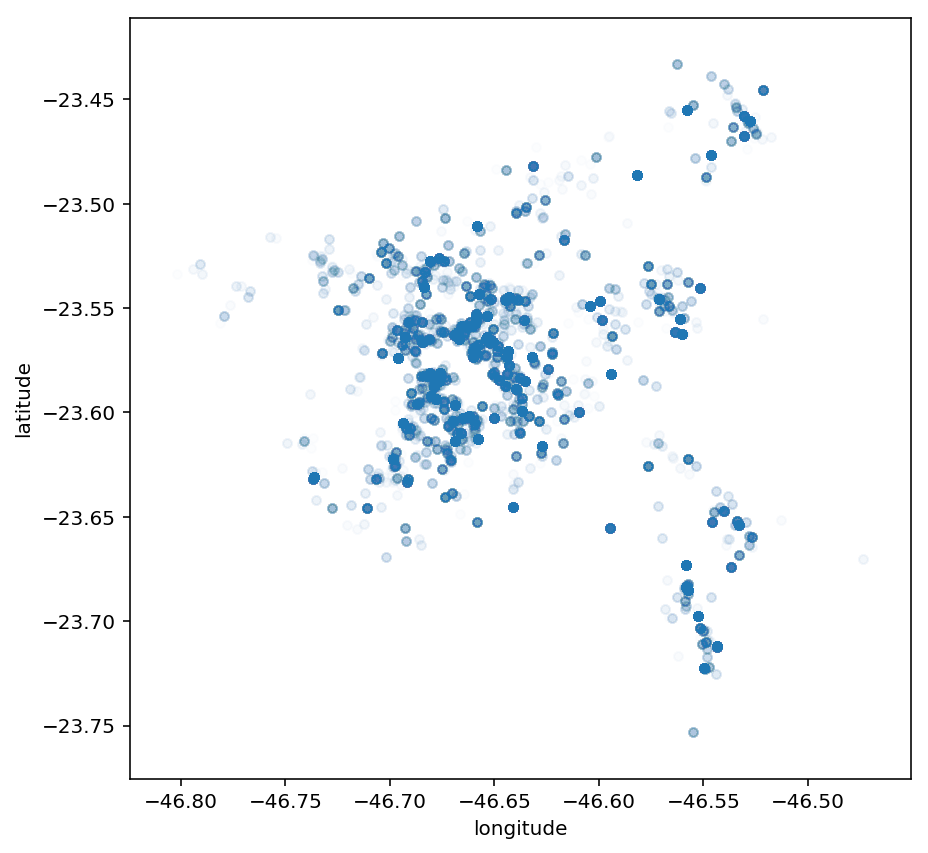

In [129]:
df[masksp].plot.scatter(x='longitude', y='latitude', figsize=(7, 7), alpha=.01)

In [133]:
df.head(1)

latitude  longitude             datehour
0 -23.00079 -43.384157  2018-10-10 11:00:00

In [134]:
bairros = gpd.read_file('./data/DistritosAdministrativos.kml')
bairros.head(1)

Name                                        Description  \
0  MANDAQUI  <html xmlns:fo="http://www.w3.org/1999/XSL/For...   

                                            geometry  
0  (POLYGON Z ((-46.65471793567885 -23.4306520687...

In [146]:
bairros.iloc[1,:][2]

In [135]:
type(bairros)

geopandas.geodataframe.GeoDataFrame

In [136]:
bairros.plot(figsize=(20,16))

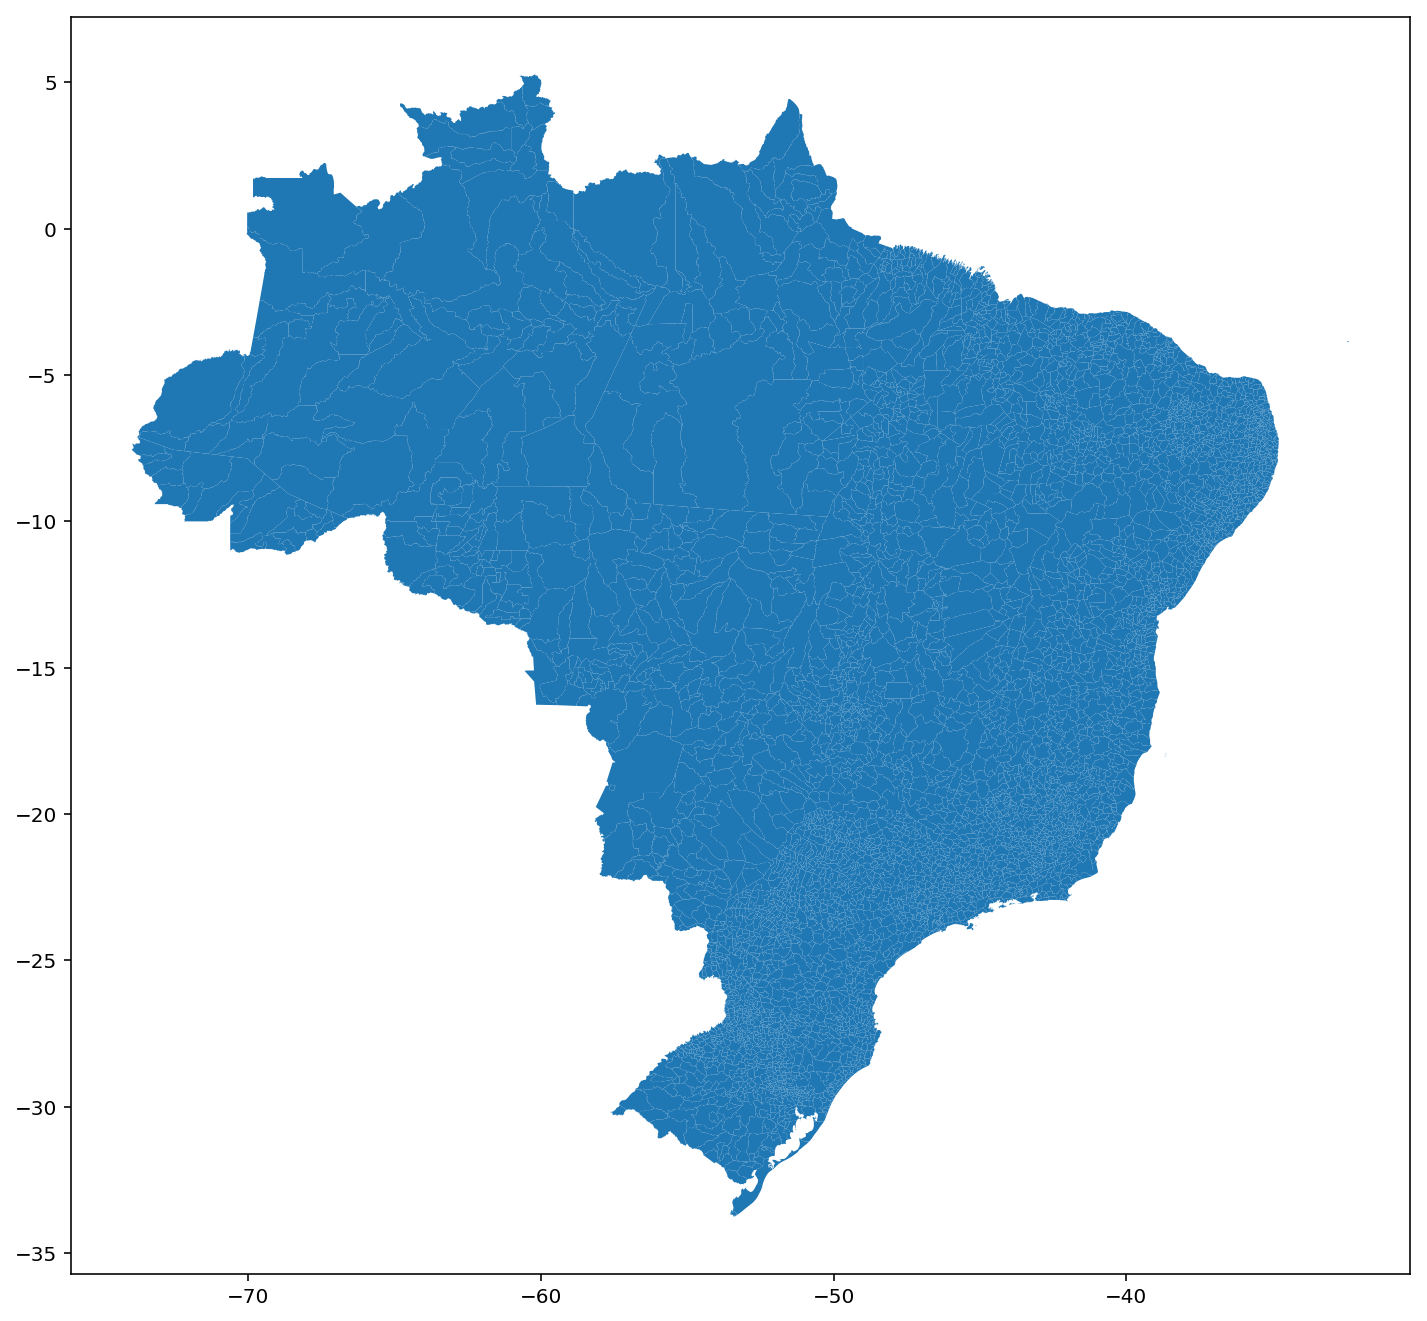

In [75]:
exemplo = gpd.read_file('data/municipios_2010.shp')
exemplo.plot(figsize=(12,12))

In [149]:
exemplo.columns

Index(['id', 'nome', 'uf', 'populacao', 'pib', 'estado_id', 'codigo_ibg',
       'geometry', 'pib_percapita', 'log_pib_percapita'],
      dtype='object')

In [159]:
exemplo[exemplo['uf'].isin(['PR','RS','SC'])].sort_values(by='pib_percapita', ascending=False)

id                    nome  uf  populacao       pib estado_id  \
3652  4378                 Triunfo  RS      25793   5777746        23   
1928  3214               Araucária  PR     119123  12371028        18   
3181  4654    São Francisco do Sul  SC      42520   3984152        24   
2178  3554       Saudade do Iguaçu  PR       5028    439668        18   
1907  4539                  Itajaí  SC     183373  15235108        24   
2956  4230         Pinhal da Serra  RS       2130    163658        23   
2904  4182           Muitos Capões  RS       2988    215397        23   
2771  4091               Garruchos  RS       3234    222017        23   
2551  3936                 Aratiba  RS       6565    391290        23   
4390  4686            Treze Tílias  SC       6341    336006        24   
1653  4684                 Treviso  SC       3527    185750        24   
2247  3543    São José dos Pinhais  PR     264210  13690888        18   
2137  3446               Paranaguá  PR     140469   7200842        18   
5456  3996                  Canoas  RS     323827  16547966        23   
3278  3292               Douradina  PR       7445    345910        18   
3261  4697           Vargem Bonita  SC       4793    218038        24   
898   4188              Nova Araçá  RS       4001    179025        23   
959   4189            Nova Bassano  RS       8840    385445        23   
2745  4062       Entre Rios do Sul  RS       3080    131677        23   
3811  4515              Guaramirim  SC      35172   1458061        24   
2657  3998     Capão Bonito do Sul  RS       1754     72702        23   
2506  4081        Fazenda Vilanova  RS       3697    152221        23   
1993  3259                Carambeí  PR      19163    784226        18   
3030  4279       Santa Cruz do Sul  RS     118374   4810913        23   
3010  4259              Rio Grande  RS     197228   7737855        23   
2807  4109             Horizontina  RS      18348    719100        23   
2815  4121               Imigrante  RS       3023    116283        23   
1862  3458                 Pinhais  PR     117008   4493030        18   
3031  4280  Santa Margarida do Sul  RS       2352     90011        23   
3659  4383                 Tupandi  RS       3924    149305        23   
...    ...                     ...  ..        ...       ...       ...   
2007  3252             Campo Magro  PR      24843    208683        18   
2026  3590                  Xambrê  PR       6012     50436        18   
1948  3222          Barbosa Ferraz  PR      12656    106074        18   
2145  3442                Palmital  PR      14865    123946        18   
2205  3510        Salto do Itararé  PR       5178     43143        18   
1637  3289       Diamante do Norte  PR       5516     45505        18   
3000  4255               Redentora  RS      10222     84195        23   
1960  3231  Boa Vista da Aparecida  PR       7911     65025        18   
1977  3242              Califórnia  PR       8069     65936        18   
1764  3400                Marilena  PR       6858     55772        18   
2839  4131                   Itati  RS       2584     20934        23   
3795  4496              Entre Rios  SC       3018     24424        24   
0     3284            Cruz Machado  PR      18040    145687        18   
1022  3317           Godoy Moreira  PR       3337     26616        18   
2061  3377                Laranjal  PR       6360     50390        18   
1810  3430            Nova Olímpia  PR       5503     43549        18   
2120  3434              Nova Tebas  PR       7398     58450        18   
2287  3575         Tunas do Paraná  PR       6256     49315        18   
834   3359                  Jaboti  PR       4902     37720        18   
376   3305                Figueira  PR       8293     63654        18   
2196  3497      Ribeirão do Pinhal  PR      13524    103190        18   
269   3302      Fazenda Rio Grande  PR      81675    618794        18   
1899  3192                  Abatiá  PR       7764     58644       

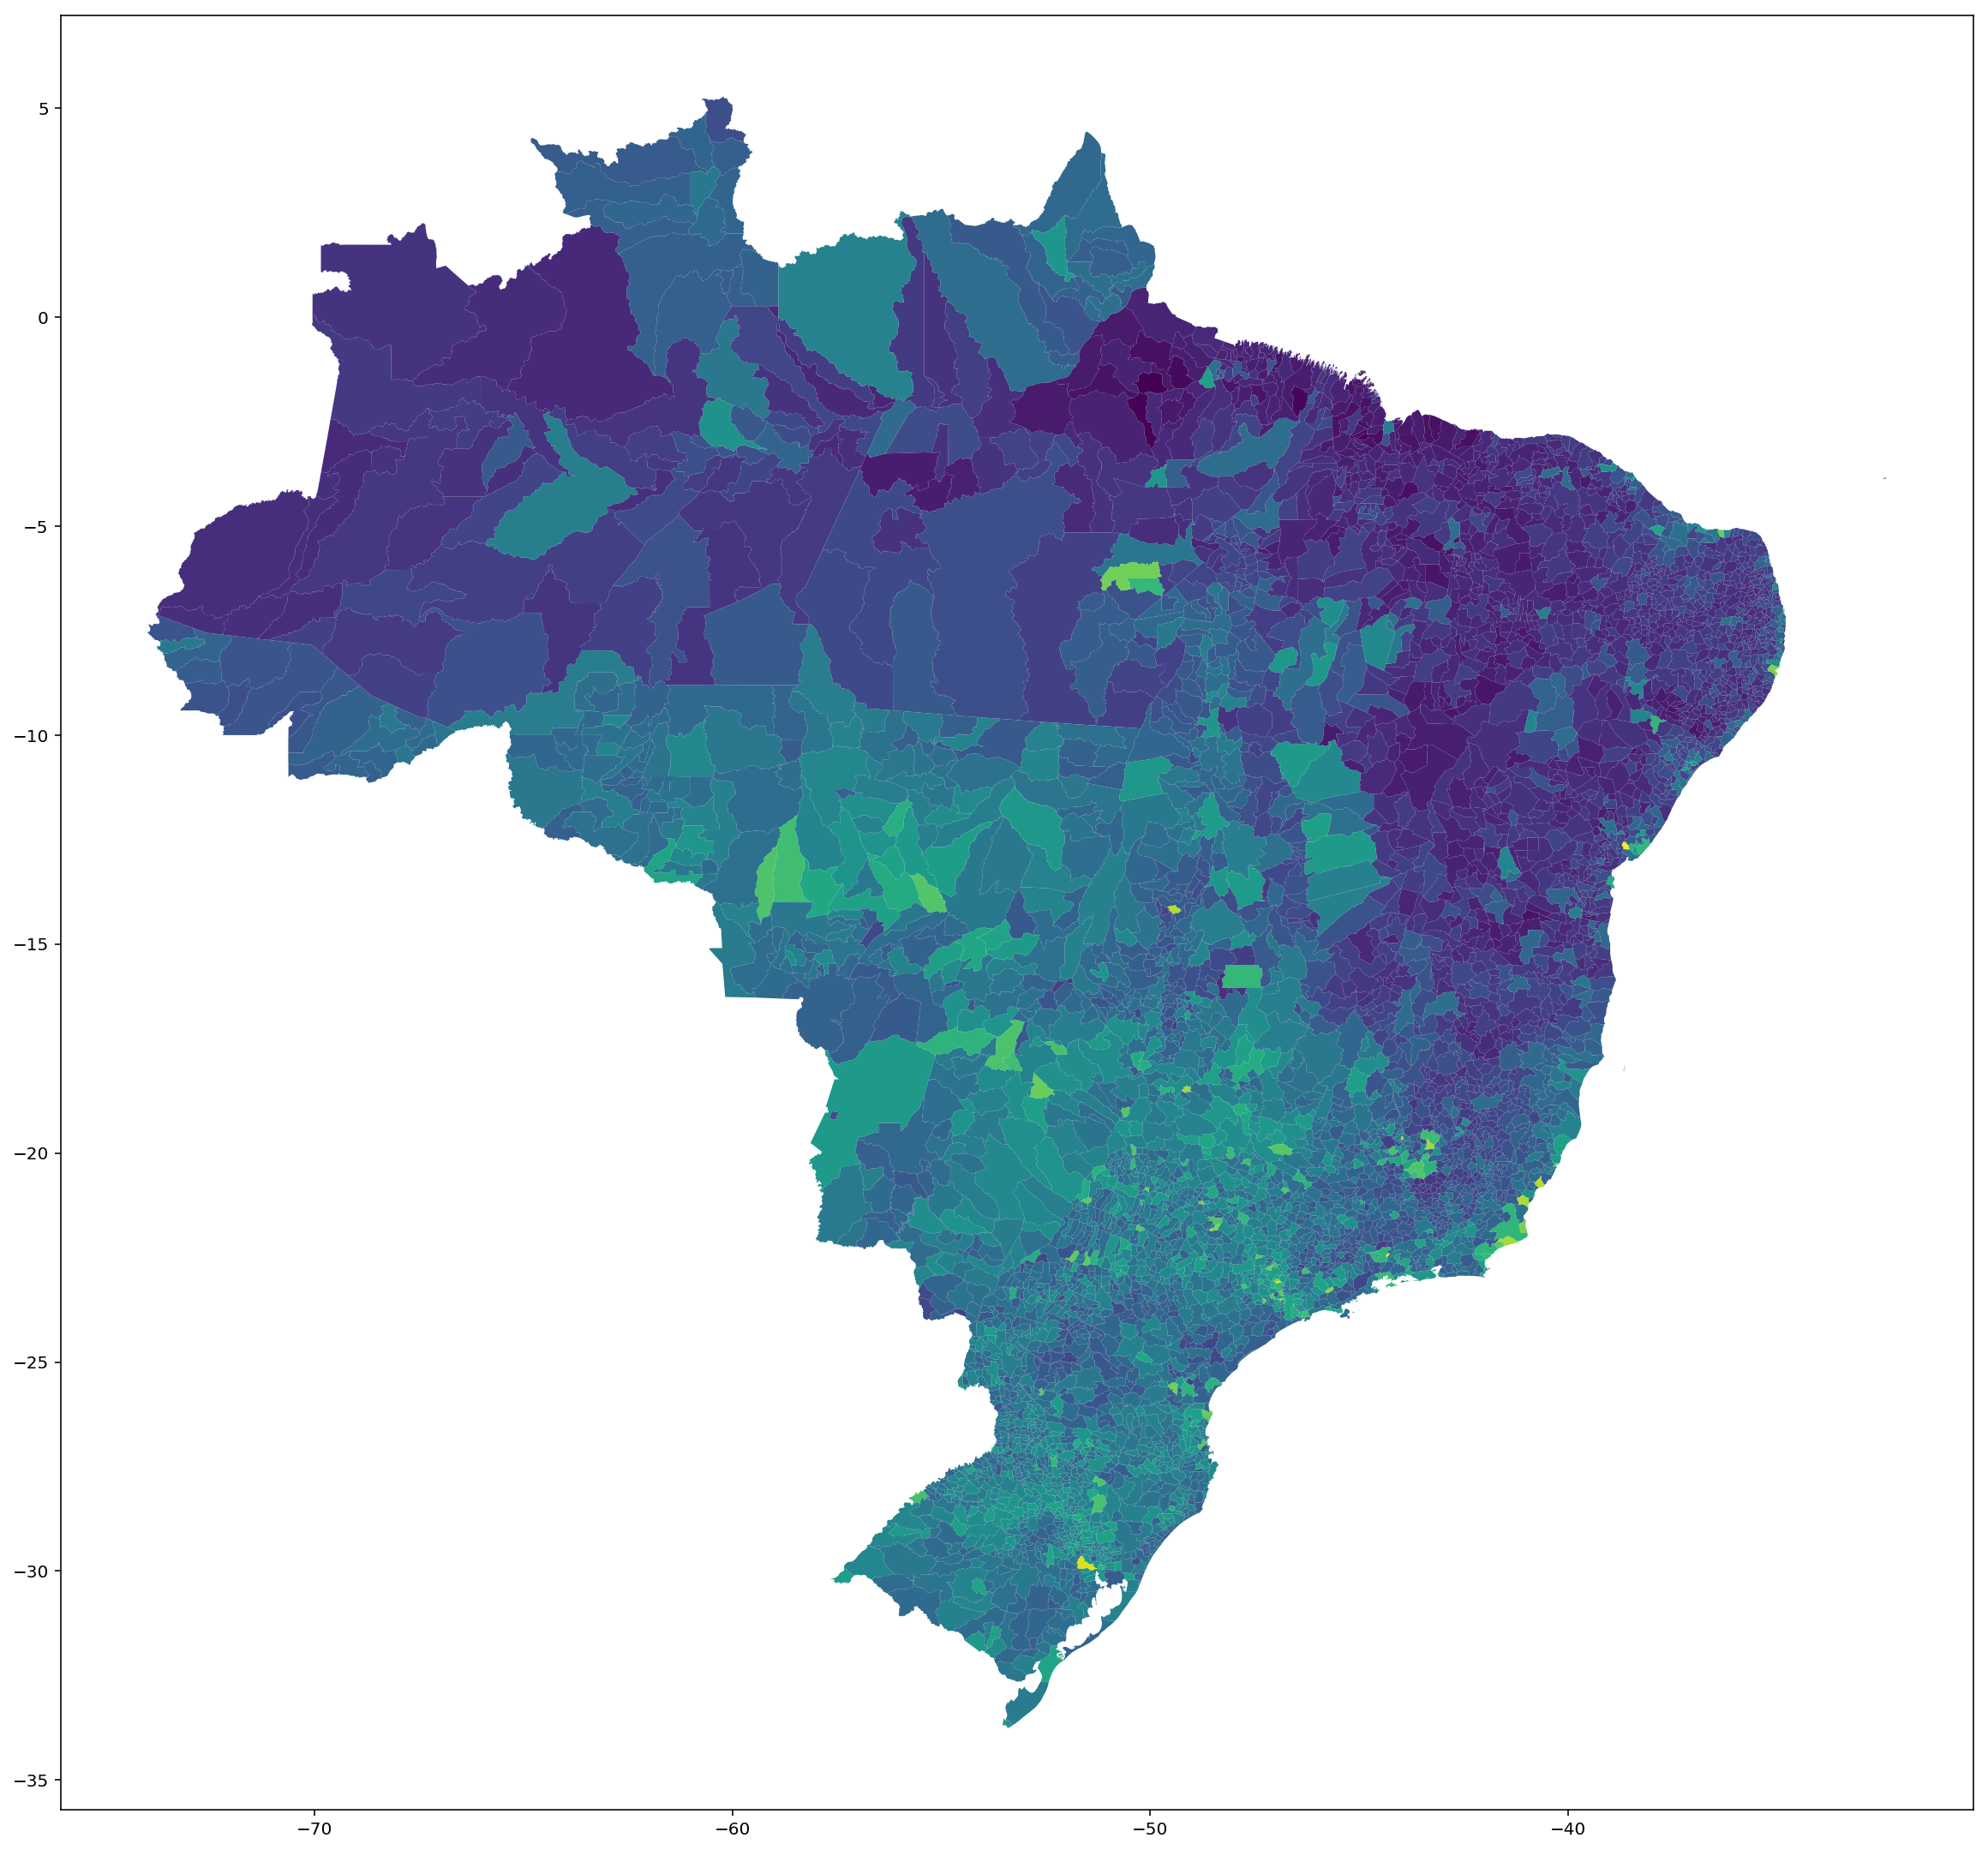

In [161]:
exemplo.plot(column='log_pib_percapita',figsize=(20,20))

C:\Users\marco\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


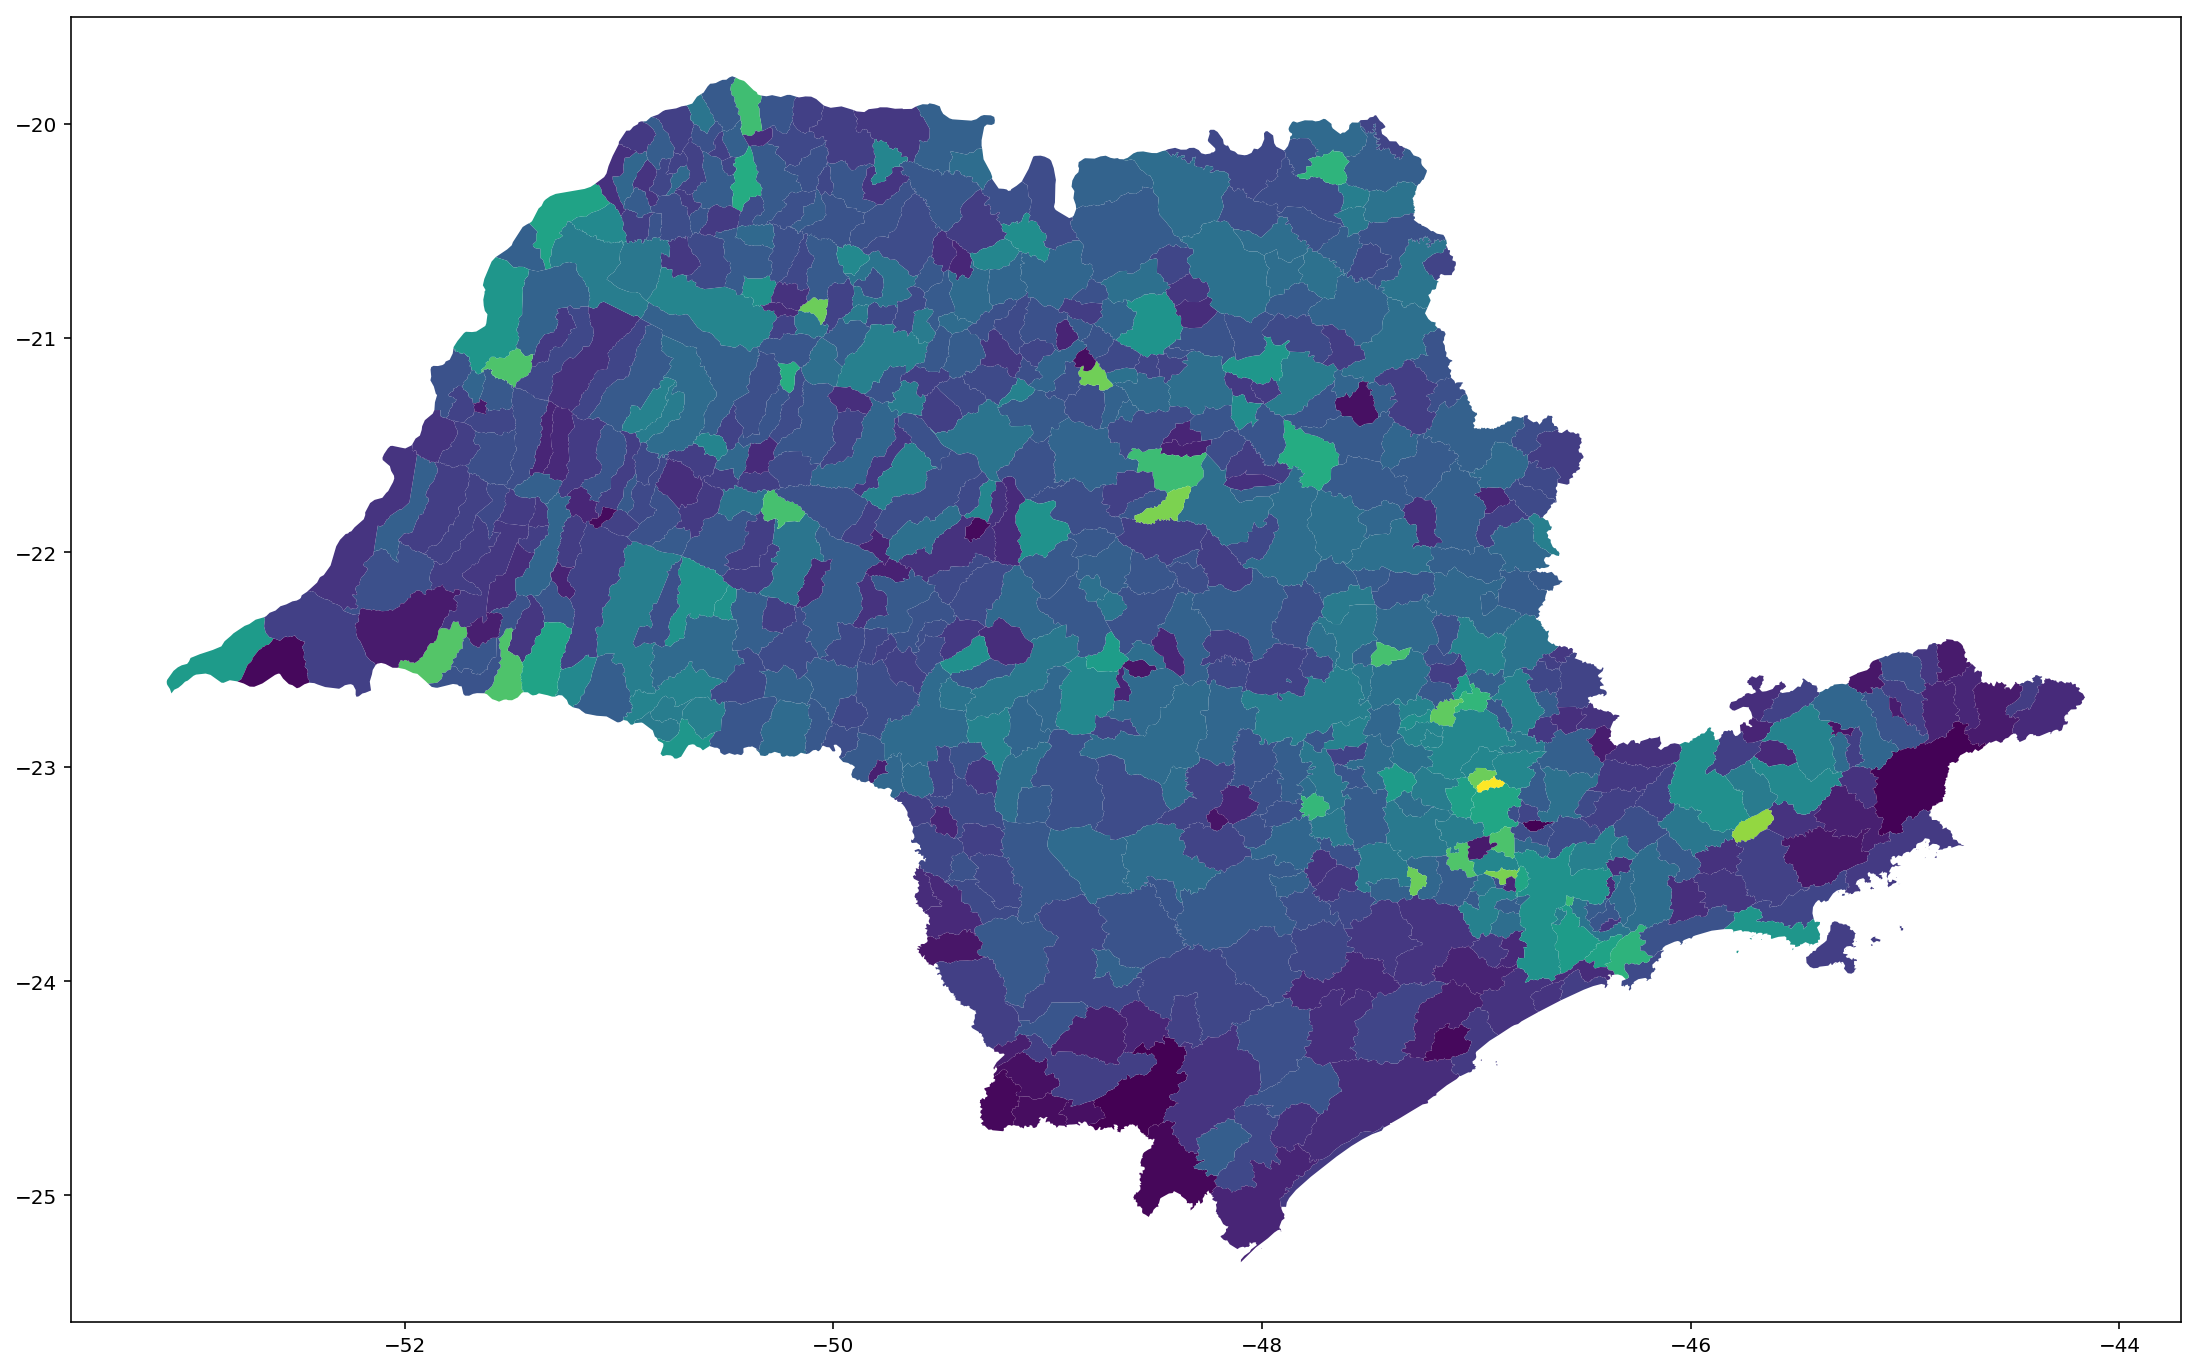

In [162]:
exemplo['populacao'] = exemplo['populacao'].astype(int)
exemplo['pib'] = exemplo['pib'].astype(int)
exemplo['pib_percapita'] = exemplo['pib']/exemplo['populacao']
exemplo['log_pib_percapita'] = np.log(exemplo['pib_percapita'])
# exemplo.sort_values(by=['pib_percapita'],ascending=False).head(10)
temp4sp=exemplo[(exemplo['uf']=='SP')]
temp4sp['log_pib_percapita'] = np.log(temp4sp['pib_percapita'])
temp4sp.plot(column='log_pib_percapita',figsize=(30,12))

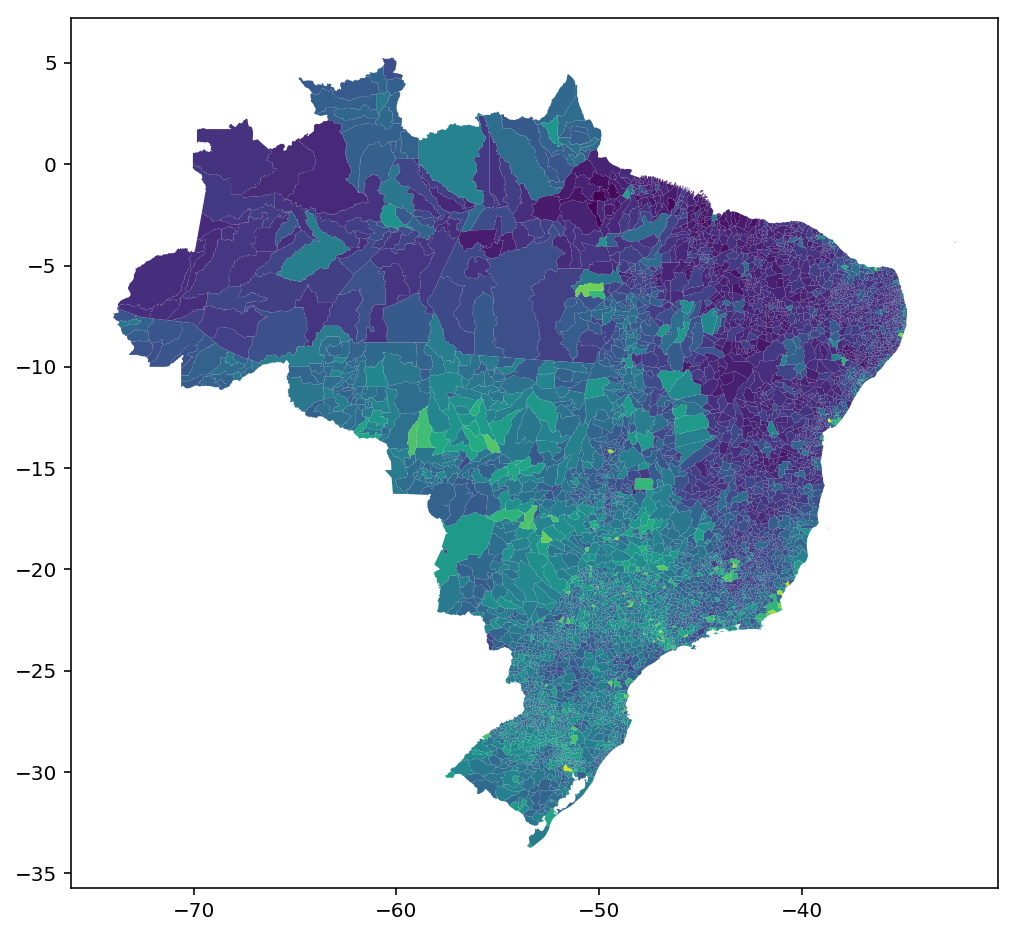

In [81]:
exemplo.plot(column='log_pib_percapita',figsize=(16,8))

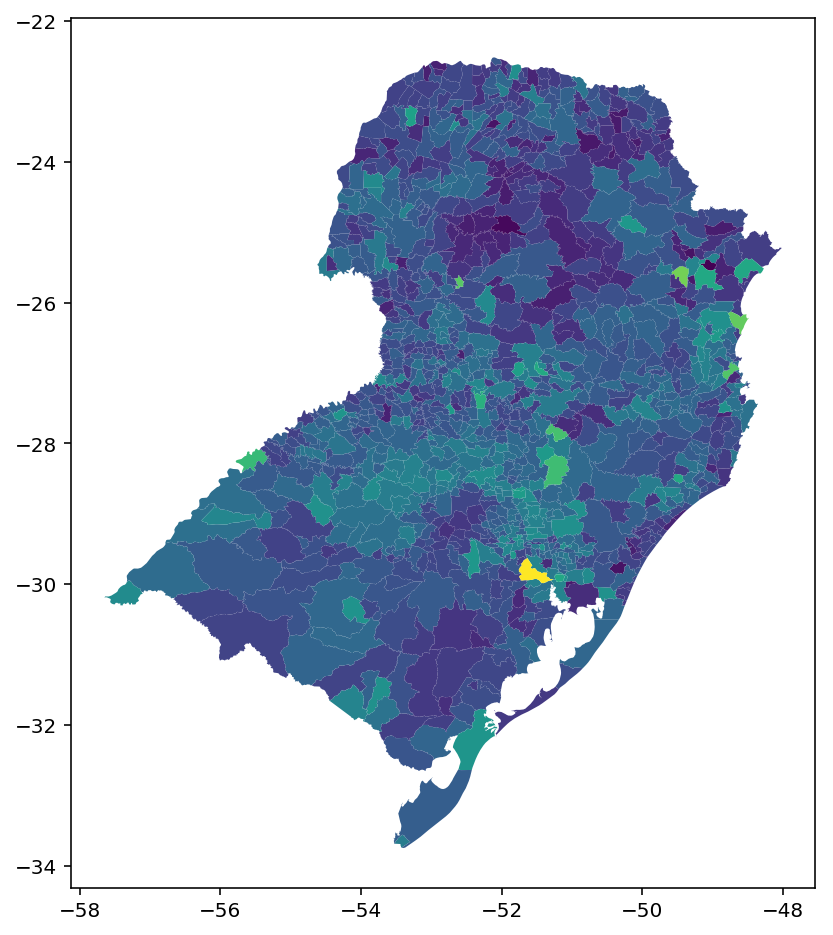

In [84]:
sul = ['SC','PR','RS']
temp4sul = exemplo[(exemplo['uf'].isin(sul))]
temp4sul.plot(column='log_pib_percapita',figsize=(18,8))

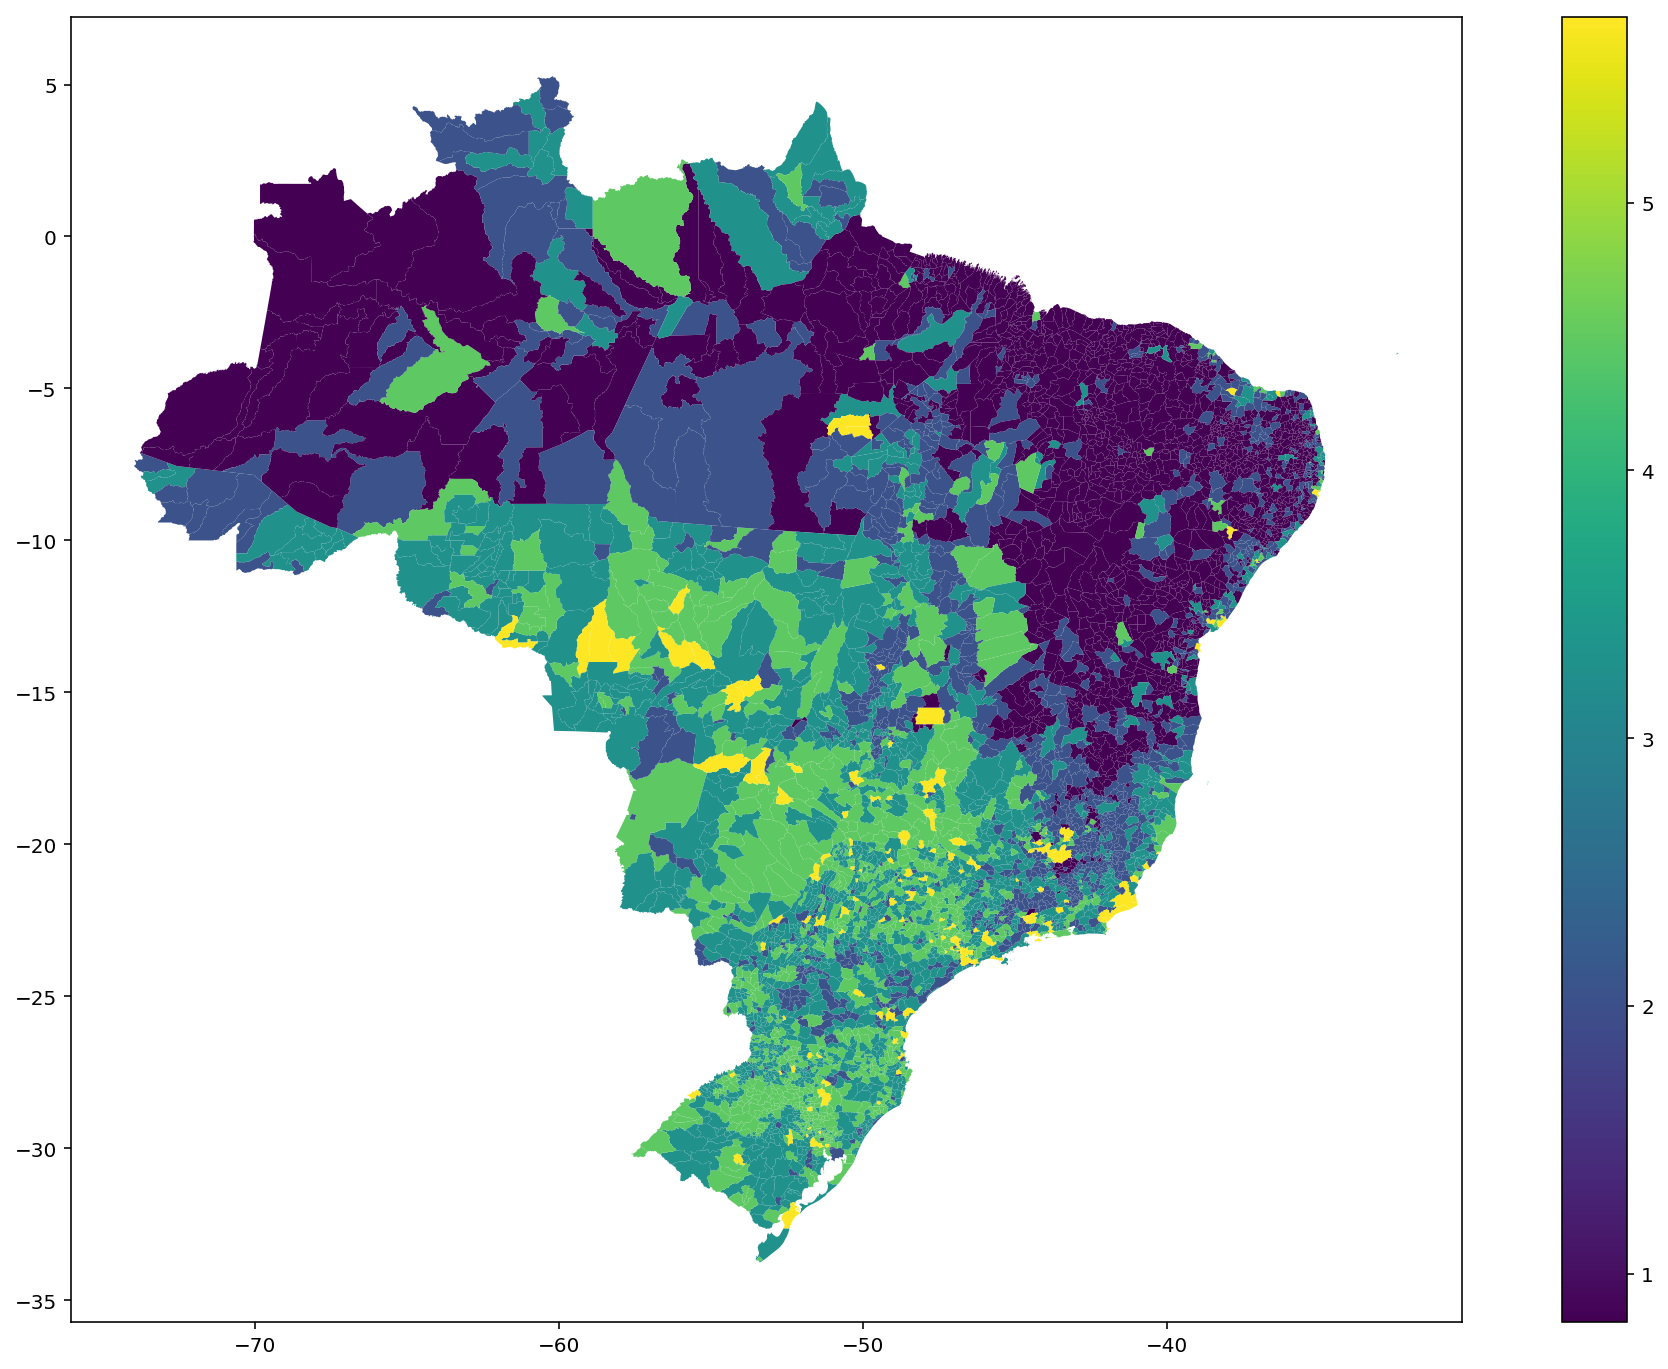

In [88]:
fig, ax = plt.subplots(1, figsize=(18, 12))
exemplo.plot(column='log_pib_percapita', ax=ax, scheme='fisher_jenks')
vmin, vmax = exemplo['log_pib_percapita'].min(), exemplo['log_pib_percapita'].max()
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
plt.show()

# Join espacial ponto -> poligono

In [89]:
from shapely.geometry import Point
from geopandas.tools import sjoin

In [91]:
points = df[['latitude','longitude']]
gpoints = gpd.GeoDataFrame(points)
gpoints['Coordinates'] = list(zip(gpoints.longitude, gpoints.latitude))
gpoints['Coordinates'] = gpoints['Coordinates'].apply(Point)
gpoints = gpd.GeoDataFrame(gpoints, geometry='Coordinates')

In [93]:
gpoints.head()

latitude  longitude                            Coordinates
0 -23.000790 -43.384157           POINT (-43.384157 -23.00079)
1 -22.906963 -43.110082          POINT (-43.110082 -22.906963)
2  -9.652079 -35.714761  POINT (-35.714761 -9.652078999999999)
3  -3.741768 -38.471682           POINT (-38.471682 -3.741768)
4 -23.585107 -46.676430           POINT (-46.67643 -23.585107)

In [100]:
bairros = gpd.GeoDataFrame(bairros, geometry='geometry')
pointInPolys = sjoin(gpoints, bairros, how='left')

In [101]:
pointInPolys.head(10)

latitude  longitude                            Coordinates  index_right  \
0 -23.000790 -43.384157           POINT (-43.384157 -23.00079)          NaN   
1 -22.906963 -43.110082          POINT (-43.110082 -22.906963)          NaN   
2  -9.652079 -35.714761  POINT (-35.714761 -9.652078999999999)          NaN   
3  -3.741768 -38.471682           POINT (-38.471682 -3.741768)          NaN   
4 -23.585107 -46.676430           POINT (-46.67643 -23.585107)         79.0   
5 -22.992828 -43.363446          POINT (-43.363446 -22.992828)          NaN   
6 -23.556598 -46.684444          POINT (-46.684444 -23.556598)         11.0   
7  -3.793682 -38.497692           POINT (-38.497692 -3.793682)          NaN   
8 -23.570320 -46.643683           POINT (-46.643683 -23.57032)         52.0   
9 -23.542037 -46.576003          POINT (-46.576003 -23.542037)         30.0   

         Name                                        Description  
0         NaN                                                NaN  
1         NaN                                                NaN  
2         NaN                                                NaN  
3         NaN                                                NaN  
4  ITAIM BIBI  <html xmlns:fo="http://www.w3.org/1999/XSL/For...  
5         NaN                                                NaN  
6   PINHEIROS  <html xmlns:fo="http://www.w3.org/1999/XSL/For...  
7         NaN                                                NaN  
8  BELA VISTA  <html xmlns:fo="http://www.w3.org/1999/XSL/For...  
9     TATUAPE  <html xmlns:fo="http://www.w3.org/1999/XSL/For...

In [164]:
grouped = pointInPolys.groupby('Name')[['Description']].count().reset_index()

In [165]:
grouped.head()

Name  Description
0          AGUA RASA            2
1  ALTO DE PINHEIROS          187
2        BARRA FUNDA          609
3         BELA VISTA         1046
4              BELEM           90

In [176]:
bairros2 = pd.merge(bairros, grouped, how='left', left_on='Name', right_on='Name').fillna(0)
bairros2.plot(column='Description_y', figsize=(8,8))